In [2]:
import sys
import os
sys.path.append(f'..{os.sep}')
import mvcomp as mvc
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [11]:
# Define your input data (subjects X tracts/ROIs) e.g., FA in each WM tract of interest for all subjects
# E.g., FA for 50 subjects, in 12 WM tracts

# Let subjects_matrix by your matrix of FA values for all tracts per subject 

np.random.seed(100)
subjects_matrix = np.random.uniform(0.5,0.9,(50,12))

# Computing D2

In [12]:
CLOBBER = True

result_dict = mvc.spatial_mvcomp(subjects_matrix, return_raw=False, exclude_comp_from_mean_cov=True)
# results are stored in a dictionary, can access array of D2 data (of all subjects) like this:
all_D2 = result_dict['all_dist']
print(all_D2.shape) # Shape will be (number of subjects) x 1 (one D2 value per subject)
out_dir = f'..{os.sep}local_extras'
out_fname = 'D2_all_subjects.npy'
# Save matrix containing all D2 data as a numpy array
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

if not os.path.exists(join(out_dir,out_fname)) or CLOBBER: 
    np.save(join(out_dir,out_fname), all_D2)
else:
    print(f'{out_fname} already exists, not overwritten')

(50,)


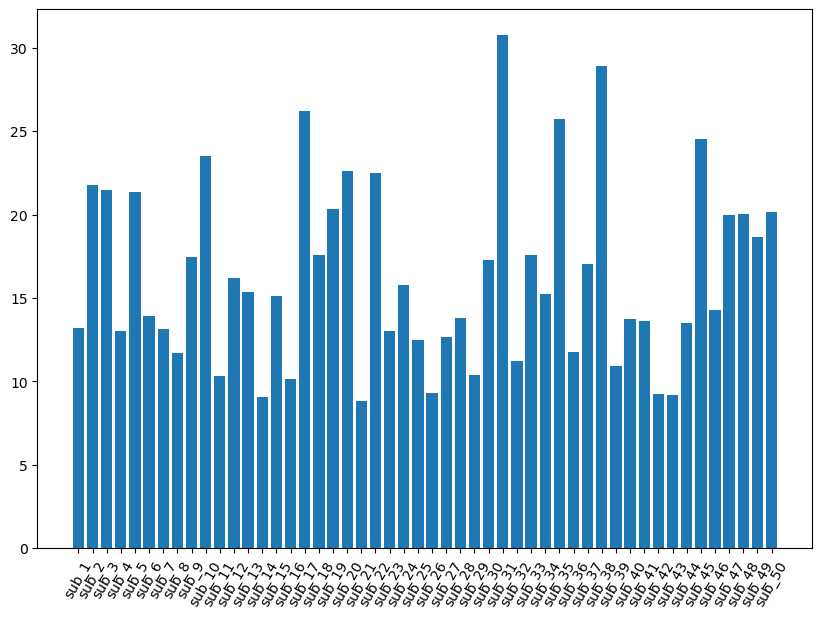

In [14]:
# We can check subject's D2 score in a simple plot of all D2 values for each subject
subject_ids = [f"sub_{str(i)}" for i in range(1, all_D2.shape[0]+1)]

figure = plt.figure(figsize=(10, 7))
plt.bar(np.arange(0, all_D2.shape[0], 1), all_D2.flatten())
plt.xticks(np.arange(0, all_D2.shape[0], 1), subject_ids, rotation=60);

# Determining feature importance

In [16]:
result_dict = mvc.spatial_mvcomp(subjects_matrix, return_raw=True, exclude_comp_from_mean_cov=True)

# results are stored in a dictionary, can access array of D2 data (of all subjects) like this:
raw_D2 = result_dict['raw_dist']
print(raw_D2.shape) # Shape will be (number of subjects) x (number of tracts) 

# The raw distances can then be summarized to obtain the relative contribution of each feature/tract
out_fname = 'raw_dist_all_subjects.npy'
if not os.path.exists(join(out_dir,out_fname)) or CLOBBER: 
    np.save(join(out_dir,out_fname), raw_D2)
else:
    print(f'{out_fname} already exists, not overwritten')

(50, 12)


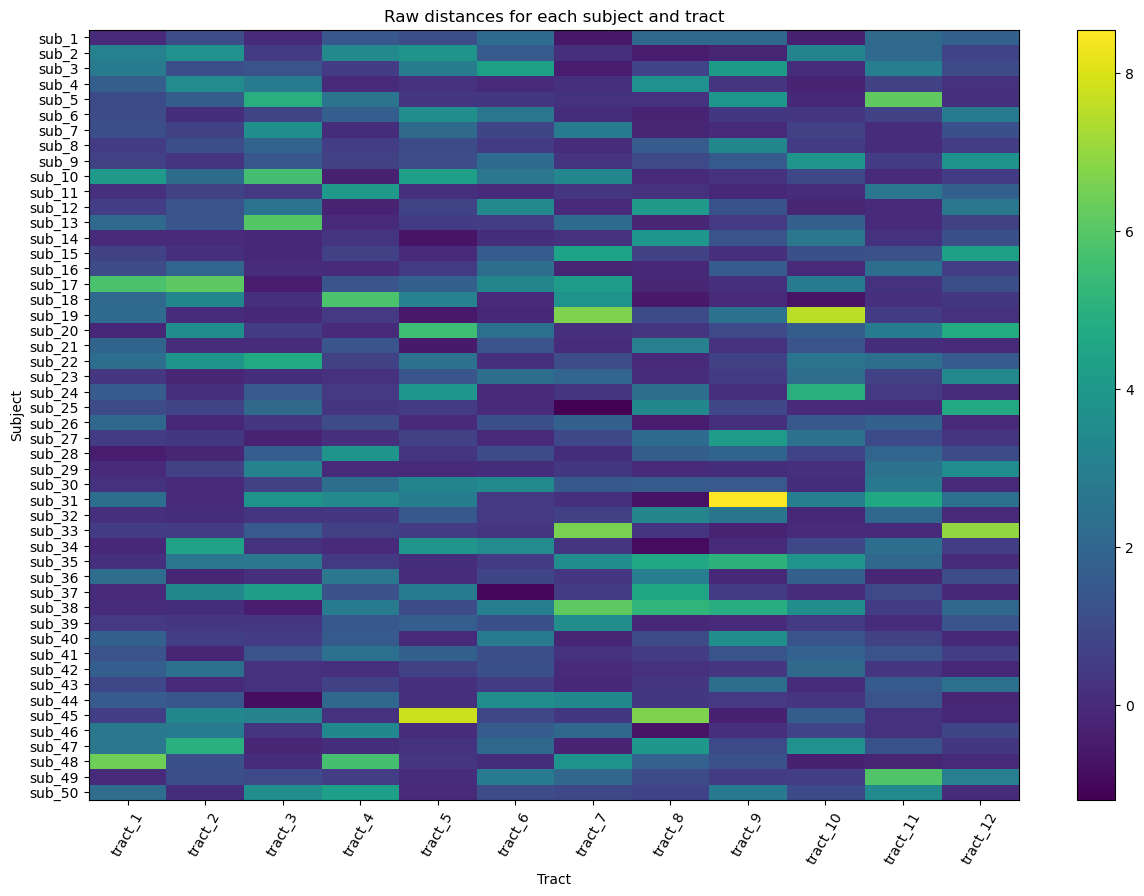

In [17]:
# Here we can plot the raw distances for each subject
figure = plt.figure(figsize=(15, 10))
plt.imshow(raw_D2, aspect='auto')
plt.colorbar()
plt.xlabel('Tract'); plt.xticks(np.arange(0, raw_D2.shape[1], 1), [f"tract_{str(i)}" for i in range(1, raw_D2.shape[1]+1)], rotation=60)
plt.ylabel('Subject'); plt.yticks(np.arange(0, raw_D2.shape[0], 1), subject_ids);
plt.title('Raw distances for each subject and tract')
plt.show()